# Mixing functions

In [1]:
using Clapeyron, PyCall
import PyPlot; const plt = PyPlot

PyPlot

In this notebook, we give examples of how one can generate mixing and excess properties in `Clapeyron.jl`.

## Mixing volume of water + ethanol

First generating the model:

In [2]:
model = PCSAFT(["water","ethanol"])

PCSAFT{BasicIdeal, Float64} with 2 components:
 "water"
 "ethanol"
Contains parameters: Mw, segment, sigma, epsilon, epsilon_assoc, bondvol

Mixing properties can be obtained for any of the bulk properties supported by `Clapeyron.jl` using the `mixing(model, p, T, z, property)` function as shown below:

In [15]:
x = range(1e-10,1-1e-10,length=100)
X = Clapeyron.FractionVector.(x)
V_E = mixing.(model,1e5,298.15,X,volume);

Plotting:

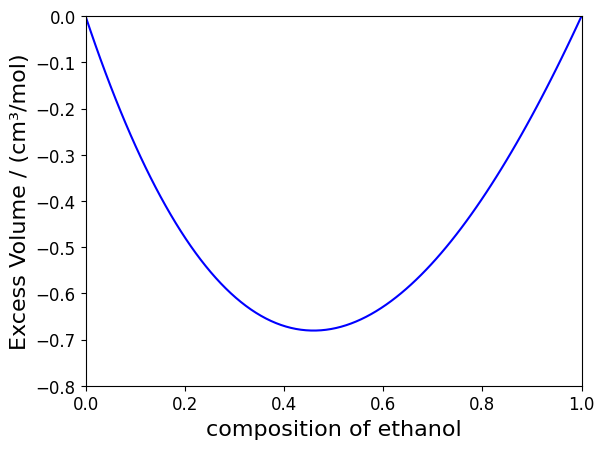

In [20]:
plt.clf()
plt.plot(1 .-x,V_E.*1e6,label="PR",linestyle="-",color="blue")
plt.xlabel("composition of ethanol",fontsize=16)
plt.ylabel("Excess Volume / (cm³/mol)",fontsize=16)
plt.ylim([-0.8,0.])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("excess_vol_etoh_h2o.svg")
display(plt.gcf())

Similarly, one can use the `excess(model, p, T, n, property)` function to obtain excess functions such as the excess Gibbs free energy:

In [17]:
g_E = excess.(model,1e5,298.15,X,gibbs_free_energy);

Plotting:

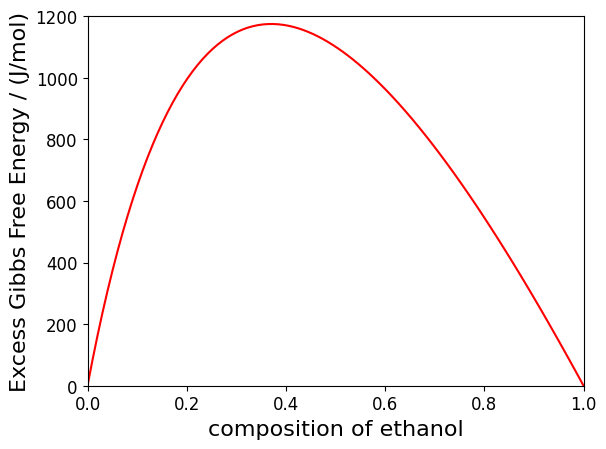

In [19]:
plt.clf()
plt.plot(1 .-x,g_E,label="",linestyle="-",color="red")
plt.xlabel("composition of ethanol",fontsize=16)
plt.ylabel("Excess Gibbs Free Energy / (J/mol)",fontsize=16)
plt.ylim([0.,1200])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
display(plt.gcf())